In [31]:
import geopandas as gpd
import sys
sys.path.insert(0, '../scripts')
import importlib
import wikidata_client
importlib.reload(wikidata_client)
import wikidata_battle_mapper
importlib.reload(wikidata_battle_mapper)
from wikidata_battle_mapper import WikidataBattleMapper

from wikidata_client import WikiDataClient


# load query from file
with open('wikidata_query_ww1_battles.sparql', 'r') as file:
    query = file.read()

wiki_client = WikiDataClient()
rawdf = wiki_client.query_to_dataframe(query)
battle_mapper = WikidataBattleMapper()
battles = battle_mapper.map_battles(rawdf)


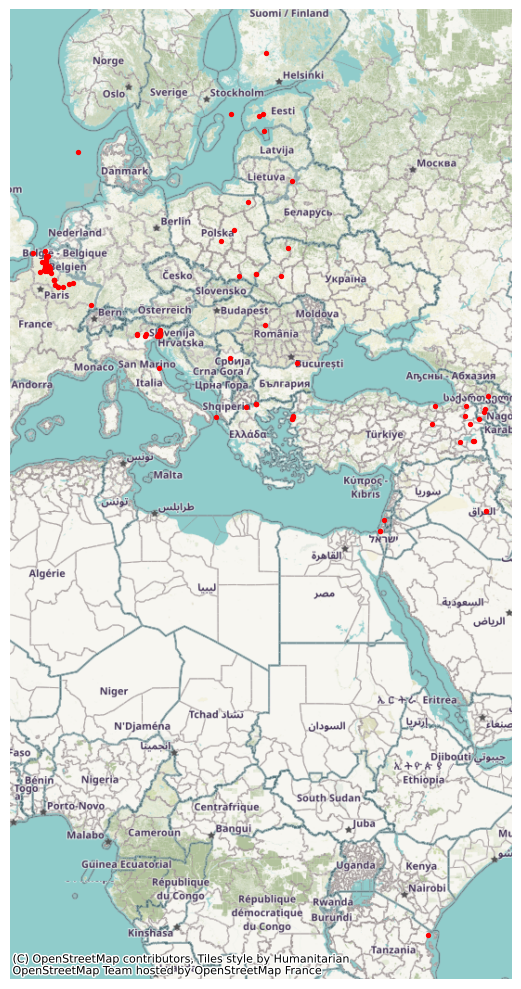

In [44]:
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib

# set battles crs to web mercator
battles = battles.to_crs(epsg=3857)

# plot the battles
fig, ax = plt.subplots(figsize=(10,10))
battles.plot(ax=ax, color='red', markersize=8)
ctx.add_basemap(ax, crs=battles.crs)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [35]:
battles.battle

0      http://www.wikidata.org/entity/Q670489
1      http://www.wikidata.org/entity/Q426227
2     http://www.wikidata.org/entity/Q2221800
3      http://www.wikidata.org/entity/Q925917
4      http://www.wikidata.org/entity/Q681517
                       ...                   
95    http://www.wikidata.org/entity/Q1600541
96    http://www.wikidata.org/entity/Q1634857
97     http://www.wikidata.org/entity/Q702255
98     http://www.wikidata.org/entity/Q920202
99     http://www.wikidata.org/entity/Q152008
Name: battle, Length: 100, dtype: object